# Introduction
**Calculating Confidence Interval for Different Timestamps:**

In this section, we calculate the Confidence Interval for various screnarios and then try to understand the pattern. This would allow us to look into the fluctuations one might expect across those scenarios. We calculated Confidence Interval for the following scenarios:
1. With interventions: Here we include all the interventions as before and at all time stamps for calculating the confidence interval.

2. Only add intervention at t2: The interventions are included only at timestamp 2.

3. Only add intervention at t5: The interventions are included only at timestamp 5.

4. Only add intervention at t9: The interventions are included only at timestamp 9.

5. Only add intervention at t12: The interventions are included only at timestamp 12.

6. Only add intervention at t15: The interventions are included only at timestamp 15.

7. Only add intervention at t19: The interventions are included only at timestamp 19.

8. Without intervention: Here we do not include any interventions at any timestamp.

In order to calculate the Confidence Intervals we take the mean scores with 4 representative timestamps namely 4, 9, 14 and 19 for each of the above scenarios with 100 simulations. After noting these average scores, we use two different approaches to calculate 95 percent Confidence Interval for all the above scenarios: One with the Stats module from Scipy library and another with Seeborn library for better visualization.


In [ ]:
pip install seaborn

Mean value without intervention after 50 runs: 36.430945943415296
Mean value only add intervention at t2 after 50 runs: 18.262100496819173
Mean value only add intervention at t5 after 50 runs: 30.774366416719793
Mean value only add intervention at t9 after 50 runs: 29.967696354486783
Mean value only add intervention at t12 after 50 runs: 18.11544532614721
Mean value only add intervention at t15 after 50 runs: 18.30422503046572
Mean value only add intervention at t19 after 50 runs: 18.288870762345436
Mean value with intervention after 50 runs: 8.253084977197929
95% Confidence Interval without intervention: (35.9543011052403, 36.90759078159031)
95% Confidence Interval only add intervention at t2: (17.529436534201892, 18.99476445943646)
95% Confidence Interval only add intervention at t5: (29.929349631984863, 31.619383201454717)
95% Confidence Interval only add intervention at t9: (29.364975843325936, 30.570416865647644)
95% Confidence Interval only add intervention at t12: (17.8736209245

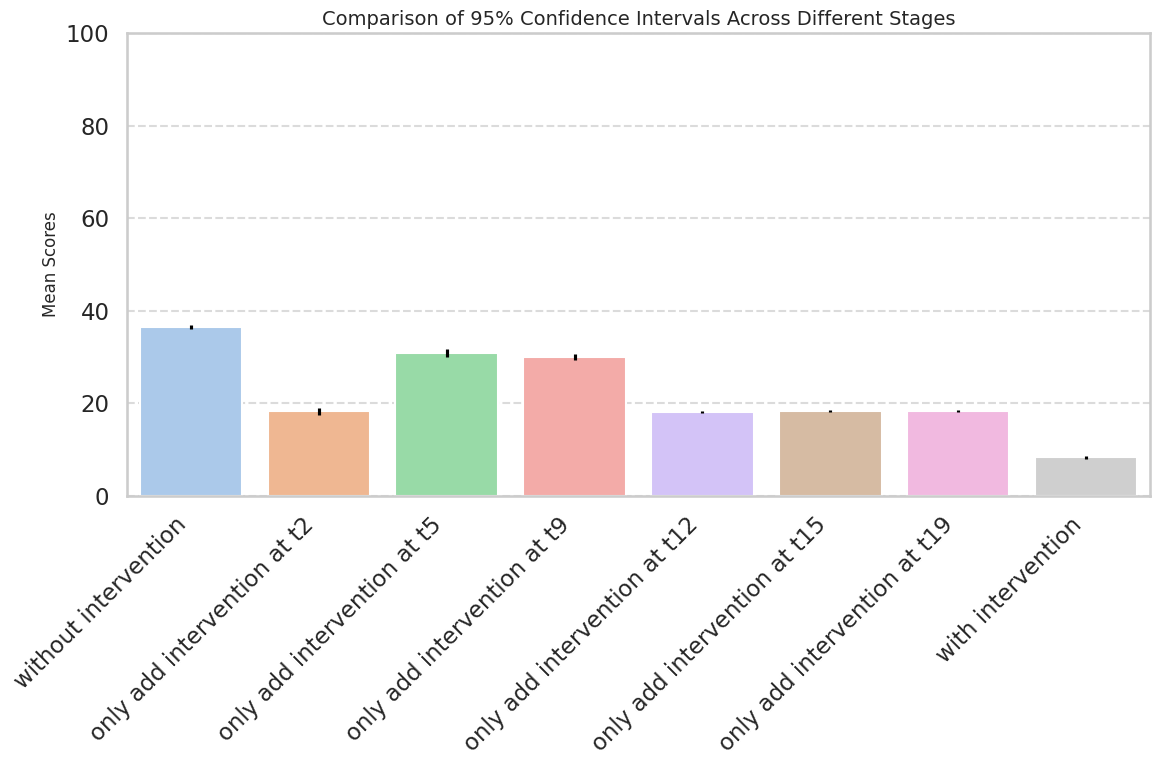

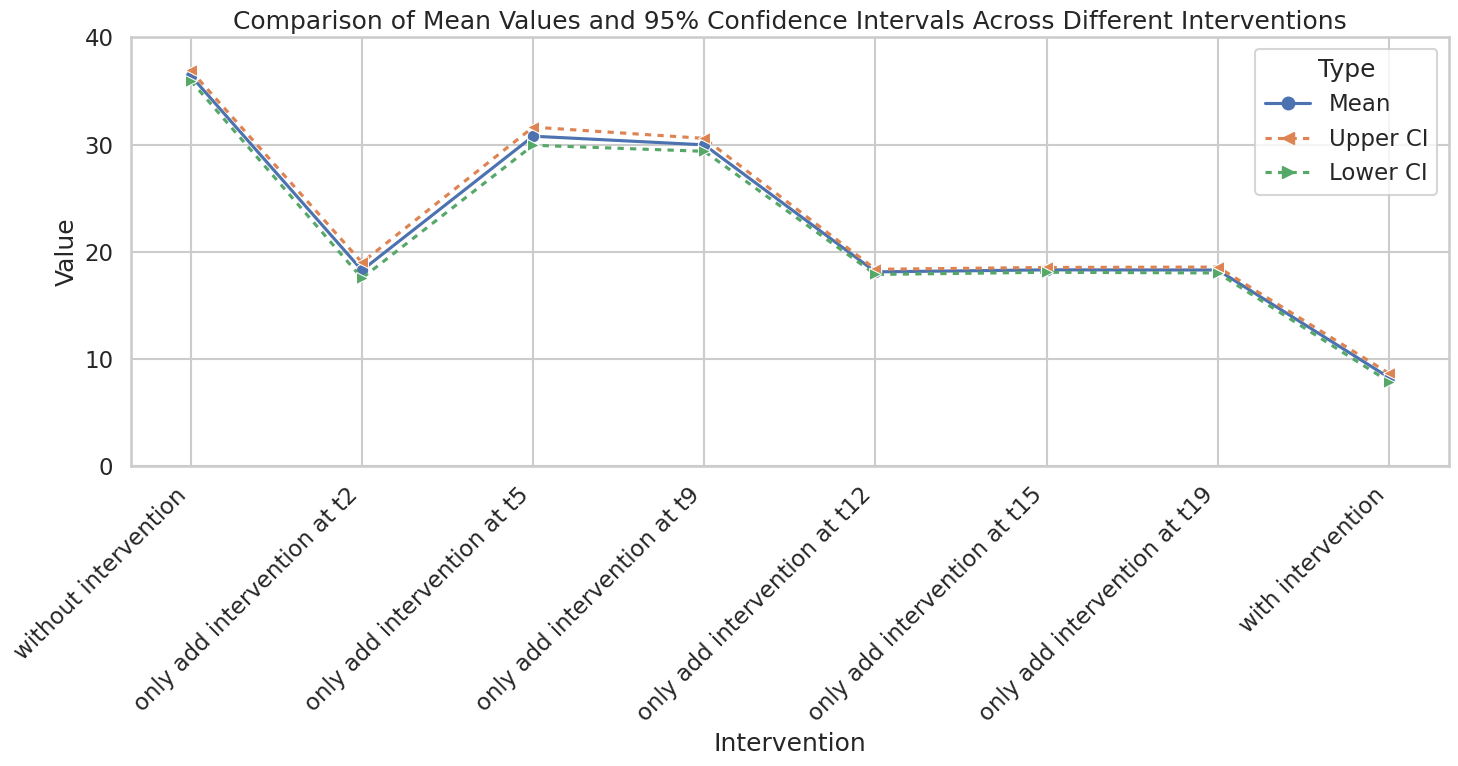

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import copy
import random

np.random.seed(55)
random.seed(55)

# We define global variables
num_agents = 100
grid_size = 10
T0_percent_high_scores = 0.13
male_percentage = 0.85

representative_scores_list = []  # with intervention
representative_a_scores_list = []  # without intervention
representative_5_scores_list = []  # only add intervention at t5
representative_2_scores_list = []  # only add intervention at t2

representative_9_scores_list = []  # only add intervention at t9
representative_12_scores_list = []  # only add intervention at t12
representative_15_scores_list = []  # only add intervention at t15
representative_19_scores_list = []  # only add intervention at t19

def initialize_agents_and_grid():
    # Defining agent class
    class Agent:
        def __init__(self, score, gender, age, advertisement_exposure):
            self.score = score
            self.gender = gender
            self.age = age
            self.fixed = False
            self.advertisement_exposure = advertisement_exposure
            self.color = self.get_color()

        def __str__(self):
            return f"Agent(score={self.score}, gender={self.gender}, age={self.age}, advertisement_exposure={self.advertisement_exposure})"

        def get_color(self):
          if self.score >= 60:
            return (1.0, 0.0, 0.0)  # red
          elif self.score >= 30:
            return (1.0, 1.0, 0.0)  # yellow
          elif self.score <= 1:
            return (1.0, 1.0, 1.0)  # white
          else:
            return (0.0, 0.0, 1.0)  # blue

    # Age ranges and their corresponding percentages
    age_ranges = [
        (0, 14, 0.09),
        (14, 19, 0.31),
        (19, 24, 0.21),
        (24, 30, 0.20),
        (30, 40, 0.13),
        (40, 60, 0.03),
        (60, 100, 0.03)
    ]
    # Advertisement impact on addiction score
    advertisement_impact = 0.1
    import random
    # Initializing agents with scores, gender, age, and advertisement exposure
    # First, we generate a list of ages according to the specified distribution:
    age_list = []
    for age_range in age_ranges:
        start, end, proportion = age_range
        num_in_range = int(proportion * num_agents)
        ages_in_range = np.random.randint(start, end, num_in_range)
        age_list.extend(ages_in_range)

    # Then we ensure the list has the right size:
    if len(age_list) < num_agents:
        age_list.extend(np.random.randint(0, 100, num_agents - len(age_list)))

    agents = []
    for i in range(num_agents):
        if i < num_agents * male_percentage:
            gender = 'Male'
        else:
            gender = 'Female'

        # # Selecting age based on the provided age ranges and percentages
        age = age_list.pop(np.random.randint(len(age_list))) # Randomly selecting

        advertisement_exposure = np.random.rand()  # Generating a random value for advertisement exposure
        score = np.random.randint(60, 100) if i < num_agents * T0_percent_high_scores else np.random.randint(0, 60)

        if i < num_agents * T0_percent_high_scores:
            score = np.random.randint(60, 100)
        else:
            score = np.random.randint(0, 60)




        # Adjusting the agent's addiction score based on advertisement exposure
        score += advertisement_exposure * advertisement_impact
        score = max(0, min(score, 100))
        agents.append(Agent(score, gender, age, advertisement_exposure))

    #copy agent
    copy_agents = copy.deepcopy(agents)

    # Marking down 41% of blue agents as fixed
    blue_agents = [agent for agent in agents if agent.score < 30]
    num_fixed_blue_agents = int(0.41 * len(blue_agents))
    for agent in blue_agents[:num_fixed_blue_agents]:
        agent.fixed = True

    # Grid environment
    grid = np.zeros((grid_size, grid_size), dtype=object)
    remaining_agents = agents.copy() # Create a list of remaining agents to place on the grid
    for i in range(grid_size):
        for j in range(grid_size):
            index = np.random.randint(len(remaining_agents))
            agent = remaining_agents.pop(index) # Remove agent from the list of remaining agents
            grid[i, j] = agent
    copy_grid=copy.deepcopy(grid)
    t2 = 20


    return agents, copy_agents, grid, copy_grid

# Without intervention
for run in range(50):


    _, copy_agents, _, copy_grid = initialize_agents_and_grid()
    agents = copy.deepcopy(copy_agents)
    grid = copy.deepcopy(copy_grid)

    #agents, copy_agents, grid, copy_grid = initialize_agents_and_grid()


    representative_scores = []

    for t in range(20):
        for i in range(grid_size):
            for j in range(grid_size):
                agent = grid[i][j]

                # If agent is fixed, we skip updating
                if agent.fixed:
                    continue

                # Determining the neighbors of the agent
                neighbors = grid[max(0, i-1):min(grid_size, i+2), max(0, j-1):min(grid_size, j+2)].flatten()
                neighbors = [n for n in neighbors if n != agent]
                neighbor_avg_score = np.mean([n.score for n in neighbors])

                if agent.score > 60:
                    agent.score = min((((agent.score * 2) + neighbor_avg_score)) / 2.0, 100)
                elif agent.score <= 1:
                    agent.score = 0
                else:
                    agent.score = min(((agent.score + neighbor_avg_score)) / 2.0, 100)

                #limit score in（0，100）
                agent.score = max(0, min(agent.score, 100))

                decay_rate = 0.651296

                if t > 9:
                    agent.score *= np.exp(-decay_rate)
                    agent.score = max(0, min(agent.score, 100))
                agent.color = agent.get_color()

        if t in [4,9,14,19]:
            representative_scores.append(np.mean([agent.score for agent in agents]))

    representative_scores_list.append(representative_scores)


# With intervention
attention_switching_effect_low = 0.11
attention_switching_effect_high = 0.19
Rationalization_Education_effect_low=0.17
Rationalization_Education_effect_high =0.02
Parental_Monitoring_effect_low=0.02
Parental_Monitoring_effect_high=0.10
Perceived_Cost_effect_low=0.13
Perceived_Cost_effect_high=0.02




for run in range(50):
    agents, copy_agents, grid, copy_grid = initialize_agents_and_grid()




    representative_a_scores = []

    # with intervention
    representative_a_scores = []
    for t in range(20):
        for i in range(grid_size):
            for j in range(grid_size):
                agent = grid[i][j]
                if agent.fixed:
                    continue

                # Determining the neighbors of the agent
                neighbors = grid[max(0, i-1):min(grid_size, i+2), max(0, j-1):min(grid_size, j+2)].flatten()
                neighbors = [n for n in neighbors if n != agent]
                neighbor_avg_score = np.mean([n.score for n in neighbors])

                if agent.score > 60:
                    agent.score *= (1 - attention_switching_effect_high)
                    agent.score *= (1 - Rationalization_Education_effect_high)
                    agent.score *= (1 - Parental_Monitoring_effect_high)
                    agent.score *= (1 - Perceived_Cost_effect_high)
                    agent.score = (((agent.score * 2) + neighbor_avg_score)) / 2.0
                    agent.score = min(100, agent.score)
                elif agent.score <= 1:
                    agent.score = 0
                else:
                    agent.score *= (1 - attention_switching_effect_low)
                    agent.score *= (1 - Rationalization_Education_effect_low)
                    agent.score *= (1 - Parental_Monitoring_effect_low)
                    agent.score *= (1 - Perceived_Cost_effect_low)
                    agent.score = (agent.score + neighbor_avg_score) / 2.0


                decay_rate = 0.651296
                if t > 9:
                    agent.score *= np.exp(-decay_rate)
                    agent.score = max(0, min(agent.score, 100))
                agent.color = agent.get_color()

        if t in [4,9,14,19]:
            representative_a_scores.append(np.mean([agent.score for agent in agents]))


    representative_a_scores_list.append(representative_a_scores)


# Only add intervention at t5
for run in range(50):
    """
    _, copy_agents, _, copy_grid = initialize_agents_and_grid()
    agents = copy.deepcopy(copy_agents)
    grid = copy.deepcopy(copy_grid) """

    agents, copy_agents, grid, copy_grid = initialize_agents_and_grid()

    representative_5_scores = []

    for t in range(20):
        for agent in agents:
            # Location of the agent in the grid
            row, col = np.where(grid == agent)

            # If we find the location of the agent
            if len(row) > 0 and len(col) > 0:
                row, col = row[0], col[0]  # np.where It returns an array, and we only need the first position

                neighbors = grid[max(0, row-1):min(grid_size, row+2), max(0, col-1):min(grid_size, col+2)].flatten()
                neighbor_scores = [n.score for n in neighbors if n != agent]

                if t == 5:
                    agent.score *= (1 - attention_switching_effect_low)
                    agent.score *= (1 - Rationalization_Education_effect_low)
                    agent.score *= (1 - Parental_Monitoring_effect_low)
                    agent.score *= (1 - Perceived_Cost_effect_low)
                    agent.score = (agent.score + np.mean(neighbor_scores)) / 2.0
                else:
                    # Ensuring here that the agent's score is not used before the average score of the neighbor is calculated
                    if neighbor_scores:
                        neighbor_avg_score = np.mean(neighbor_scores)
                    else:
                        continue  # If the agent has no neighbors, the loop is skipped

                    if agent.score > 60:
                        agent.score = ((agent.score + neighbor_avg_score) / 2.0) * 1.5
                        agent.score = min(100, agent.score)
                    elif agent.score <= 1:
                        agent.score = 0
                    else:
                        agent.score = (agent.score + neighbor_avg_score) / 2.0

            decay_rate = 0.651296
            if t > 9:
                agent.score *= np.exp(-decay_rate)
            agent.color = agent.get_color()

        if t in [4,9,14,19]:
            representative_5_scores.append(np.mean([agent.score for agent in agents]))

    representative_5_scores_list.append(representative_5_scores)

# Only add intervention at t2
for run in range(50):
    """
    _, copy_agents, _, copy_grid = initialize_agents_and_grid()
    agents = copy.deepcopy(copy_agents)
    grid = copy.deepcopy(copy_grid)  """

    agents, copy_agents, grid, copy_grid = initialize_agents_and_grid()

    representative_2_scores = []

    for t in range(20):
        for agent in agents:
            # Location of the agent in the grid
            row, col = np.where(grid == agent)

            # If we find the location of the agent
            if len(row) > 0 and len(col) > 0:
                row, col = row[0], col[0]  # np.where It returns an array, and we only need the first position

                neighbors = grid[max(0, row-1):min(grid_size, row+2), max(0, col-1):min(grid_size, col+2)].flatten()
                neighbor_scores = [n.score for n in neighbors if n != agent]

                if t == 2:
                    agent.score *= (1 - attention_switching_effect_low)
                    agent.score *= (1 - Rationalization_Education_effect_low)
                    agent.score *= (1 - Parental_Monitoring_effect_low)
                    agent.score *= (1 - Perceived_Cost_effect_low)
                    agent.score = (agent.score + np.mean(neighbor_scores)) / 2.0
                else:
                    # Ensuring that the agent's score is not used before the average score of the neighbor is calculated
                    if neighbor_scores:
                        neighbor_avg_score = np.mean(neighbor_scores)
                    else:
                        continue  # If the agent has no neighbors, the loop is skipped

                    if agent.score > 60:
                        agent.score = ((agent.score + neighbor_avg_score) / 2.0) * 1.5
                        agent.score = min(100, agent.score)
                    elif agent.score <= 1:
                        agent.score = 0
                    else:
                        agent.score = (agent.score + neighbor_avg_score) / 2.0

            decay_rate = 0.651296
            if t > 9:
                agent.score *= np.exp(-decay_rate)
            agent.color = agent.get_color()

        if t in [4,9,14,19]:
            representative_2_scores.append(np.mean([agent.score for agent in agents]))

    representative_2_scores_list.append(representative_2_scores)

# Only add intervention at t9

for run in range(50):
    """
    _, copy_agents, _, copy_grid = initialize_agents_and_grid()
    agents = copy.deepcopy(copy_agents)
    grid = copy.deepcopy(copy_grid) """

    agents, copy_agents, grid, copy_grid = initialize_agents_and_grid()

    representative_9_scores = []

    for t in range(20):
        for agent in agents:
            # Location of the agent in the grid
            row, col = np.where(grid == agent)

            # If we find the location of the agent
            if len(row) > 0 and len(col) > 0:
                row, col = row[0], col[0]  # np.where It returns an array, and we only need the first position

                neighbors = grid[max(0, row-1):min(grid_size, row+2), max(0, col-1):min(grid_size, col+2)].flatten()
                neighbor_scores = [n.score for n in neighbors if n != agent]

                if t == 9:
                    agent.score *= (1 - attention_switching_effect_low)
                    agent.score *= (1 - Rationalization_Education_effect_low)
                    agent.score *= (1 - Parental_Monitoring_effect_low)
                    agent.score *= (1 - Perceived_Cost_effect_low)
                    agent.score = (agent.score + np.mean(neighbor_scores)) / 2.0
                else:
                    # Ensuring that the agent's score is not used before the average score of the neighbor is calculated
                    if neighbor_scores:
                        neighbor_avg_score = np.mean(neighbor_scores)
                    else:
                        continue  # If the agent has no neighbors, the loop is skipped

                    if agent.score > 60:
                        agent.score = ((agent.score + neighbor_avg_score) / 2.0) * 1.5
                        agent.score = min(100, agent.score)
                    elif agent.score <= 1:
                        agent.score = 0
                    else:
                        agent.score = (agent.score + neighbor_avg_score) / 2.0

            decay_rate = 0.651296
            if t > 9:
                agent.score *= np.exp(-decay_rate)
            agent.color = agent.get_color()

        if t in [4,9,14,19]:
            representative_9_scores.append(np.mean([agent.score for agent in agents]))

    representative_9_scores_list.append(representative_9_scores)


# Only add intervention at t12

for run in range(50):

    _, copy_agents, _, copy_grid = initialize_agents_and_grid()
    agents = copy.deepcopy(copy_agents)
    grid = copy.deepcopy(copy_grid)

    #agents, copy_agents, grid, copy_grid = initialize_agents_and_grid()

    representative_12_scores = []

    for t in range(20):
        for agent in agents:
            # Location of the agent in the grid
            row, col = np.where(grid == agent)

            # If we find the location of the agent
            if len(row) > 0 and len(col) > 0:
                row, col = row[0], col[0]  # np.where It returns an array, and we only need the first position

                neighbors = grid[max(0, row-1):min(grid_size, row+2), max(0, col-1):min(grid_size, col+2)].flatten()
                neighbor_scores = [n.score for n in neighbors if n != agent]

                if t == 12:
                    agent.score *= (1 - attention_switching_effect_low)
                    agent.score *= (1 - Rationalization_Education_effect_low)
                    agent.score *= (1 - Parental_Monitoring_effect_low)
                    agent.score *= (1 - Perceived_Cost_effect_low)
                    agent.score = (agent.score + np.mean(neighbor_scores)) / 2.0
                else:
                    # Ensuring that the agent's score is not used before the average score of the neighbor is calculated
                    if neighbor_scores:
                        neighbor_avg_score = np.mean(neighbor_scores)
                    else:
                        continue  # If the agent has no neighbors, the loop is skipped

                    if agent.score > 60:
                        agent.score = ((agent.score + neighbor_avg_score) / 2.0) * 1.5
                        agent.score = min(100, agent.score)
                    elif agent.score <= 1:
                        agent.score = 0
                    else:
                        agent.score = (agent.score + neighbor_avg_score) / 2.0

            decay_rate = 0.651296
            if t > 9:
                agent.score *= np.exp(-decay_rate)
            agent.color = agent.get_color()

        if t in [4,9,14,19]:
            representative_12_scores.append(np.mean([agent.score for agent in agents]))

    representative_12_scores_list.append(representative_12_scores)


# Only add intervention at t15
for run in range(50):

    _, copy_agents, _, copy_grid = initialize_agents_and_grid()
    agents = copy.deepcopy(copy_agents)
    grid = copy.deepcopy(copy_grid)

    #agents, copy_agents, grid, copy_grid = initialize_agents_and_grid()

    representative_15_scores = []

    for t in range(20):
        for agent in agents:
            # Location of the agent in the grid
            row, col = np.where(grid == agent)

            # If we find the location of the agent
            if len(row) > 0 and len(col) > 0:
                row, col = row[0], col[0]  # np.where It returns an array, and we only need the first position

                neighbors = grid[max(0, row-1):min(grid_size, row+2), max(0, col-1):min(grid_size, col+2)].flatten()
                neighbor_scores = [n.score for n in neighbors if n != agent]

                if t == 15:
                    agent.score *= (1 - attention_switching_effect_low)
                    agent.score *= (1 - Rationalization_Education_effect_low)
                    agent.score *= (1 - Parental_Monitoring_effect_low)
                    agent.score *= (1 - Perceived_Cost_effect_low)
                    agent.score = (agent.score + np.mean(neighbor_scores)) / 2.0
                else:
                    # Ensuring that the agent's score is not used before the average score of the neighbor is calculated
                    if neighbor_scores:
                        neighbor_avg_score = np.mean(neighbor_scores)
                    else:
                        continue  # If the agent has no neighbors, the loop is skipped

                    if agent.score > 60:
                        agent.score = ((agent.score + neighbor_avg_score) / 2.0) * 1.5
                        agent.score = min(100, agent.score)
                    elif agent.score <= 1:
                        agent.score = 0
                    else:
                        agent.score = (agent.score + neighbor_avg_score) / 2.0

            decay_rate = 0.651296
            if t > 9:
                agent.score *= np.exp(-decay_rate)
            agent.color = agent.get_color()

        if t in [4,9,14,19]:
            representative_15_scores.append(np.mean([agent.score for agent in agents]))

    representative_15_scores_list.append(representative_15_scores)


# Only add intervention at t19

for run in range(50):

    _, copy_agents, _, copy_grid = initialize_agents_and_grid()
    agents = copy.deepcopy(copy_agents)
    grid = copy.deepcopy(copy_grid)

    #agents, copy_agents, grid, copy_grid = initialize_agents_and_grid()

    representative_19_scores = []

    for t in range(20):
        for agent in agents:
            # Location of the agent in the grid
            row, col = np.where(grid == agent)

            # If we find the location of the agent
            if len(row) > 0 and len(col) > 0:
                row, col = row[0], col[0]  # np.where It returns an array, and we only need the first position

                neighbors = grid[max(0, row-1):min(grid_size, row+2), max(0, col-1):min(grid_size, col+2)].flatten()
                neighbor_scores = [n.score for n in neighbors if n != agent]

                if t == 19:
                    agent.score *= (1 - attention_switching_effect_low)
                    agent.score *= (1 - Rationalization_Education_effect_low)
                    agent.score *= (1 - Parental_Monitoring_effect_low)
                    agent.score *= (1 - Perceived_Cost_effect_low)
                    agent.score = (agent.score + np.mean(neighbor_scores)) / 2.0
                else:
                    # Ensuring that the agent's score is not used before the average score of the neighbor is calculated
                    if neighbor_scores:
                        neighbor_avg_score = np.mean(neighbor_scores)
                    else:
                        continue  # If the agent has no neighbors, the loop is skipped

                    if agent.score > 60:
                        agent.score = ((agent.score + neighbor_avg_score) / 2.0) * 1.5
                        agent.score = min(100, agent.score)
                    elif agent.score <= 1:
                        agent.score = 0
                    else:
                        agent.score = (agent.score + neighbor_avg_score) / 2.0

            decay_rate = 0.651296
            if t > 9:
                agent.score *= np.exp(-decay_rate)
            agent.color = agent.get_color()

        if t in [4,9,14,19]:
            representative_19_scores.append(np.mean([agent.score for agent in agents]))

    representative_19_scores_list.append(representative_19_scores)

# Averages and results
avg_representative_scores = np.mean(representative_scores_list, axis=0)


avg_representative_a_scores = np.mean(representative_a_scores_list, axis=0)


avg_representative_5_scores = np.mean(representative_5_scores_list, axis=0)


avg_representative_2_scores = np.mean(representative_2_scores_list, axis=0)


avg_representative_9_scores = np.mean(representative_9_scores_list, axis=0)


avg_representative_12_scores = np.mean(representative_12_scores_list, axis=0)


avg_representative_15_scores = np.mean(representative_15_scores_list, axis=0)


avg_representative_19_scores = np.mean(representative_19_scores_list, axis=0)


mean_without_intervention = np.mean(avg_representative_scores)
mean_with_intervention = np.mean(avg_representative_a_scores)
mean_only_add_intervention_at_t5 = np.mean(avg_representative_5_scores)
mean_only_add_intervention_at_t2 = np.mean(avg_representative_2_scores)
mean_only_add_intervention_at_t9 = np.mean(avg_representative_9_scores)
mean_only_add_intervention_at_t12 = np.mean(avg_representative_12_scores)
mean_only_add_intervention_at_t15 = np.mean(avg_representative_15_scores)
mean_only_add_intervention_at_t19 = np.mean(avg_representative_19_scores)

print(f"Mean value without intervention after 50 runs: {mean_without_intervention}")
print(f"Mean value only add intervention at t2 after 50 runs: {mean_only_add_intervention_at_t2}")
print(f"Mean value only add intervention at t5 after 50 runs: {mean_only_add_intervention_at_t5}")
print(f"Mean value only add intervention at t9 after 50 runs: {mean_only_add_intervention_at_t9}")
print(f"Mean value only add intervention at t12 after 50 runs: {mean_only_add_intervention_at_t12}")
print(f"Mean value only add intervention at t15 after 50 runs: {mean_only_add_intervention_at_t15}")
print(f"Mean value only add intervention at t19 after 50 runs: {mean_only_add_intervention_at_t19}")
print(f"Mean value with intervention after 50 runs: {mean_with_intervention}")

def compute_confidence_interval(data, confidence=0.95):
    degrees_freedom = len(data) - 1
    sample_mean = np.mean(data)
    sample_standard_error = stats.sem(data)
    confidence_interval = stats.t.interval(confidence, degrees_freedom, sample_mean, sample_standard_error)
    return confidence_interval

# 95% confidence intervals
confidence_interval_without_intervention = compute_confidence_interval([np.mean(run) for run in representative_scores_list])
confidence_interval_only_add_intervention_at_t2 = compute_confidence_interval([np.mean(run) for run in representative_2_scores_list])
confidence_interval_only_add_intervention_at_t5 = compute_confidence_interval([np.mean(run) for run in representative_5_scores_list])
confidence_interval_only_add_intervention_at_t9 = compute_confidence_interval([np.mean(run) for run in representative_9_scores_list])
confidence_interval_only_add_intervention_at_t12 = compute_confidence_interval([np.mean(run) for run in representative_12_scores_list])
confidence_interval_only_add_intervention_at_t15 = compute_confidence_interval([np.mean(run) for run in representative_15_scores_list])
confidence_interval_only_add_intervention_at_t19 = compute_confidence_interval([np.mean(run) for run in representative_19_scores_list])
confidence_interval_with_intervention = compute_confidence_interval([np.mean(run) for run in representative_a_scores_list])

print(f"95% Confidence Interval without intervention: {confidence_interval_without_intervention}")
print(f"95% Confidence Interval only add intervention at t2: {confidence_interval_only_add_intervention_at_t2}")
print(f"95% Confidence Interval only add intervention at t5: {confidence_interval_only_add_intervention_at_t5}")
print(f"95% Confidence Interval only add intervention at t9: {confidence_interval_only_add_intervention_at_t9}")
print(f"95% Confidence Interval only add intervention at t12: {confidence_interval_only_add_intervention_at_t12}")
print(f"95% Confidence Interval only add intervention at t15: {confidence_interval_only_add_intervention_at_t15}")
print(f"95% Confidence Interval only add intervention at t19: {confidence_interval_only_add_intervention_at_t19}")
print(f"95% Confidence Interval with intervention: {confidence_interval_with_intervention}")


# Using matplotlib to plot the mean scores and confidence intervals
# Names for plotting
labels = [
    'without intervention', 'only add intervention at t2', 'only add intervention at t5',
    'only add intervention at t9', 'only add intervention at t12', 'only add intervention at t15',
    'only add intervention at t19', 'with intervention'
]

# Means for each stage
means = [
    mean_without_intervention, mean_only_add_intervention_at_t2, mean_only_add_intervention_at_t5,
    mean_only_add_intervention_at_t9, mean_only_add_intervention_at_t12, mean_only_add_intervention_at_t15,
    mean_only_add_intervention_at_t19, mean_with_intervention
]

# Confidence intervals for each stage
confidence_intervals = [
    confidence_interval_without_intervention,
    confidence_interval_only_add_intervention_at_t2,
    confidence_interval_only_add_intervention_at_t5,
    confidence_interval_only_add_intervention_at_t9,
    confidence_interval_only_add_intervention_at_t12,
    confidence_interval_only_add_intervention_at_t15,
    confidence_interval_only_add_intervention_at_t19,
    confidence_interval_with_intervention
]
# Extracting lower and upper bounds for error bars

min_length = min(len(means), len(confidence_intervals))
yerr_lower = [means[i] - confidence_intervals[i][0] for i in range(min_length)]
yerr_upper = [confidence_intervals[i][1] - means[i] for i in range(min_length)]

yerr = [yerr_lower, yerr_upper]

# Using Seaborn to plot the mean scores and confidence intervals
plt.figure(figsize=(12, 8))
sns.barplot(x=labels, y=means, yerr=yerr, palette="pastel", capsize=0.1, errwidth=2, ecolor='black')
plt.ylabel('Mean Scores', fontsize=12)
plt.title('Comparison of 95% Confidence Intervals Across Different Stages', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()

import pandas as pd


# We create a dataframe
df = pd.DataFrame({
    'Intervention': labels * 2,  # Duplicate labels for lower and upper bounds
    'Value': means + [ci[1] for ci in confidence_intervals],  # Mean and upper CI values
    'Type': ['Mean'] * len(labels) + ['Upper CI'] * len(labels)  # Distinguishing mean and CI
})

# Including the lower confidence intervals
df_lower_ci = pd.DataFrame({
    'Intervention': labels,
    'Value': [ci[0] for ci in confidence_intervals],
    'Type': ['Lower CI'] * len(labels)
})

df = pd.concat([df, df_lower_ci], axis=0).reset_index(drop=True)

import seaborn as sns
import matplotlib.pyplot as plt

# Style and context
sns.set_style("whitegrid")
sns.set_context("talk")

"""
# Create lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Intervention', y='Value', hue='Type', style='Type',
             dashes=[(2, 2) if t == "Upper CI" or t == "Lower CI" else "" for t in df['Type'].unique()],
             markers=["o", "<", ">"],
             palette="deep")

plt.xticks(rotation=45)
plt.title("Comparison of Mean Values and 95% Confidence Intervals Across Different Interventions")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

"""

# We create lineplot
plt.figure(figsize=(15, 8))  #15, 8
sns.lineplot(data=df, x='Intervention', y='Value', hue='Type', style='Type',
             dashes=[(2, 2) if t == "Upper CI" or t == "Lower CI" else "" for t in df['Type'].unique()],
             markers=["o", "<", ">"],
             palette="deep")

plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, max(df['Value']) + 10, 10))
plt.title("Comparison of Mean Values and 95% Confidence Intervals Across Different Interventions")

plt.tight_layout()
plt.show()



# Conclusion

We plot the different scenarios along with Confidence Intervals in order to understand the pattern. As expected the average scores are highest when we do not apply any intervention, i.e without intervention. And it is lowest when all the interventions are implemented, i.e with interventions. During the intial growing phase timestamp t2 when the game is slowing reaching other agents, we expect the average scores to be not that high compared to later timestamps in the growing phase. The plot shows similar figures as expected with mean value for Only add intervention at t2 is 18.262100496819173 whereas
mean value for Only add intervention at t5 and mean value Only add intervention at t9 are 30.774366416719793 and 29.967696354486783 respectively. And in the diminishing phase, i.e at later timestamps the mean scores are lower as expected since the game is being forgotten in this phase. The calculations for the CIs were based on a total of 50 runs and not more. It is because with more runs(ex-500, 100), the CI narrowed down more and more making the visualization plot difficult to interpret.

# Appendix
In the code, the column named "Value" in the DataFrame df contains a collection of all the mean scores and their corresponding confidence interval bounds (both lower and upper) across different intervention scenarios.


Mean Scores: For each intervention type (e.g., "without intervention", "only add intervention at t2", etc.), we had already computed an average score, which represents the central value for that intervention scenario. This is the primary metric of interest we want to compare across different scenarios.

Confidence Intervals: Alongside the mean scores, we had computed 95% confidence intervals. The confidence intervals give us a range in which we can be "95% confident" that the true mean (population mean) lies. This is based on the data from the 100 runs we've conducted. So for each intervention scenario, we have a lower bound and an upper bound of the confidence interval. These provide context to the mean scores, allowing we to see the range of uncertainty around each mean.

So, in the DataFrame:

Where the "Type" column reads "Mean", the "Value" column contains the mean scores.
Where the "Type" column reads "Lower CI", the "Value" column contains the lower bound of the 95% confidence intervals.
Where the "Type" column reads "Upper CI", the "Value" column contains the upper bound of the 95% confidence intervals.
In summary, on the y-axis of our plot:

"Value" represents the primary metric (mean scores) and its associated range of uncertainty (confidence interval bounds). When we look at the plot, the line labeled as "Mean" represents the average score for each intervention type. The lines labeled as "Lower CI" and "Upper CI" provide the context of how sure we can be about those mean scores based on the data from our runs.